In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('marketing_campaign_data.csv')

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

In [5]:
# Basic investigation
print("--- First 5 rows ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicated Rows ---")
print(df.duplicated().sum())

--- First 5 rows ---
   Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  \
0         0  04-09-2012       58   635000      88000           546000   
1         1  08-03-2014       38    11000       1000             6000   
2         0  21-08-2013       26   426000      49000           127000   
3         0  10-02-2014       26    11000       4000            20000   
4         0  19-01-2014       94   173000      43000           118000   

   MntFishProducts  MntSweetProducts  MntGoldProds  N

In [4]:
# Print distinct values
print("\nDistinct Values for Each Column:")
for col in df.columns:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values[:20]}{'...' if len(unique_values) > 20 else ''} (Total: {len(unique_values)})")


Distinct Values for Each Column:
Unnamed: 0: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]... (Total: 2240)
ID: [5524 2174 4141 6182 5324 7446  965 6177 4855 5899 1994  387 2125 8180
 2569 2114 9736 4939 6565 2278]... (Total: 2240)
Year_Birth: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979]... (Total: 59)
Education: ['S1' 'S3' 'S2' 'SMA' 'D3'] (Total: 5)
Marital_Status: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda'] (Total: 6)
Income: [58138000. 46344000. 71613000. 26646000. 58293000. 62513000. 55635000.
 33454000. 30351000.  5648000.       nan  7500000. 63033000. 59354000.
 17323000. 82800000. 41850000. 37760000. 76995000. 33812000.]... (Total: 1975)
Kidhome: [0 1 2] (Total: 3)
Teenhome: [0 1 2] (Total: 3)
Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '3

## Feature Engineering
Let's create several new features that have the potential to provide deeper insights:
1. Customer Age: Calculate the customer's age based on their birth year.
2. Total Children: Calculate the total number of children in the household (Kidhome + Teenhome).
3. Total Spending: Calculate the total spending on all products (MntCoke + MntFruits + MntMeatProducts + MntFishProducts + MntSweetProducts + MntGoldProds).
4. Total Transactions: Calculate the total transactions from various channels (NumDealsPurchases + NumWebPurchases + NumCatalogPurchases + NumStorePurchases).
5. Conversion Rate: Calculate the ratio of responses to the number of web visits (Response / NumWebVisitsMonth).

In [3]:
# Calculate Customer Age
df['Customer_Age'] = 2023 - df['Year_Birth']

# Calculate Total Children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

# Calculate Total Spending
df['Total_Spending'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate Total Transactions
df['Total_Transactions'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Calculate Conversion Rate
df['Conversion_Rate'] = df['Response'] / df['NumWebVisitsMonth']

## EDA

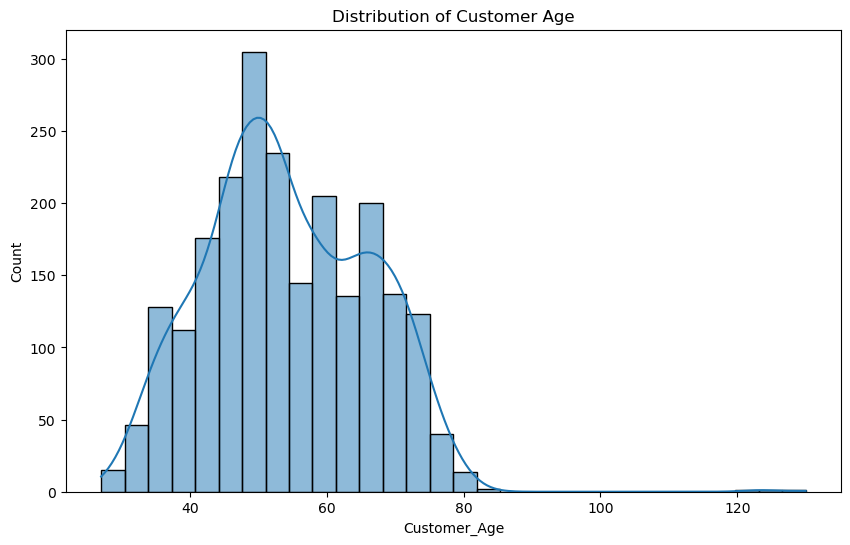

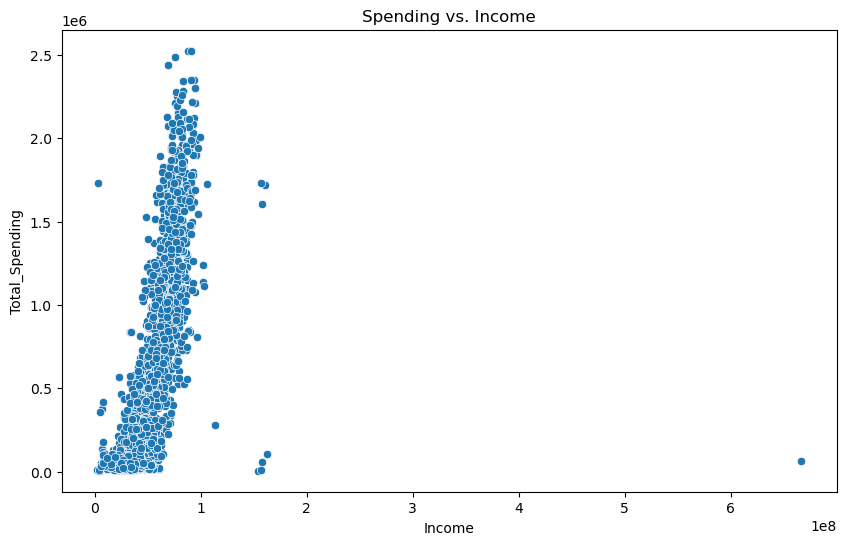

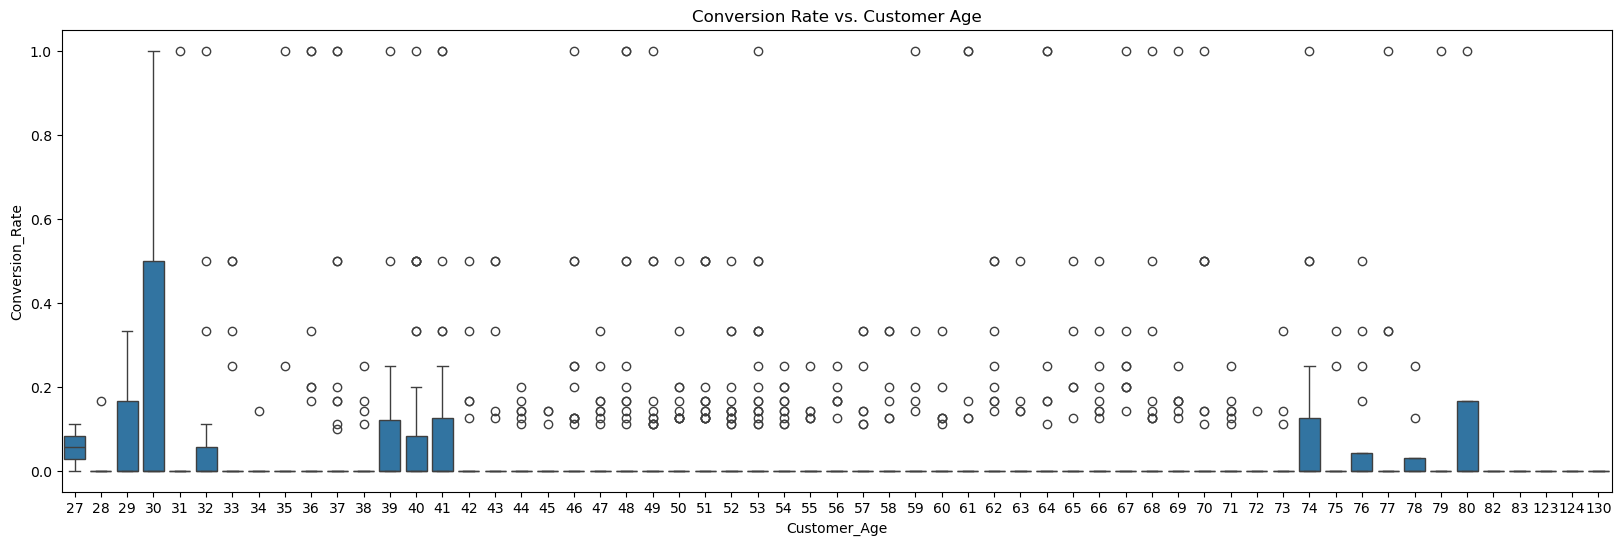

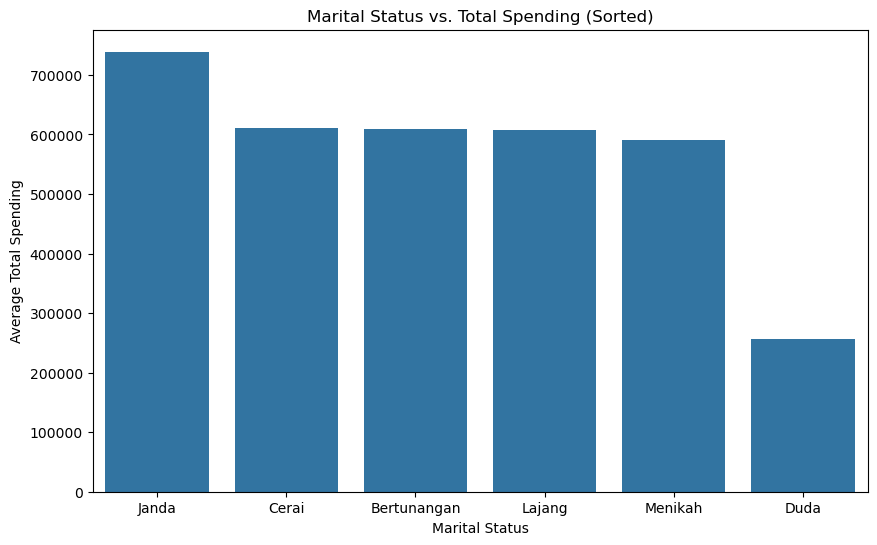

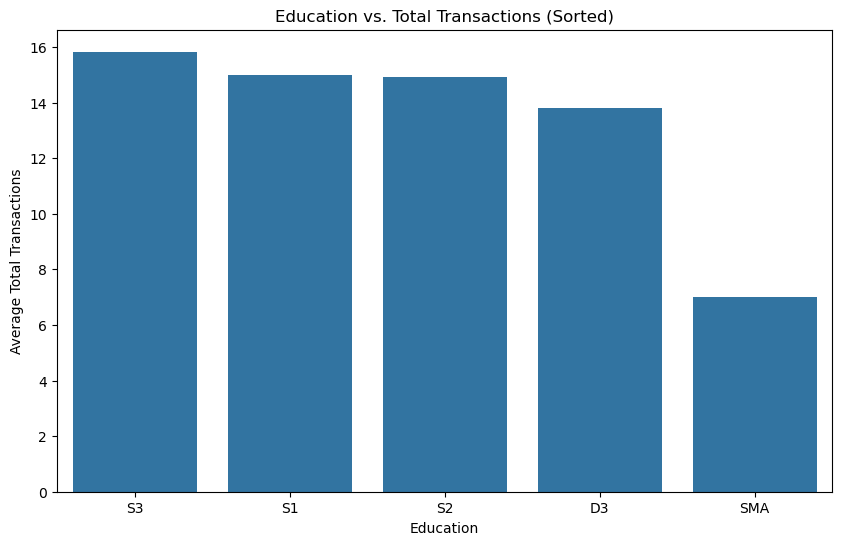

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Customer_Age'], bins=30, kde=True)
plt.title('Distribution of Customer Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=df)
plt.title('Spending vs. Income')
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(x='Customer_Age', y='Conversion_Rate', data=df)
plt.title('Conversion Rate vs. Customer Age')
plt.show()

# --- Sorting Bar Plots ---

# 1. Marital Status
plt.figure(figsize=(10, 6))
marital_status_spending = df.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending=False)
sns.barplot(x=marital_status_spending.index, y=marital_status_spending.values)
plt.title('Marital Status vs. Total Spending (Sorted)')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Spending')
plt.show()

# 2. Education
plt.figure(figsize=(10, 6))
education_transactions = df.groupby('Education')['Total_Transactions'].mean().sort_values(ascending=False)
sns.barplot(x=education_transactions.index, y=education_transactions.values)
plt.title('Education vs. Total Transactions (Sorted)')
plt.xlabel('Education')
plt.ylabel('Average Total Transactions')
plt.show()

### Interpretations:
1. **Distribution of Customer Age**:
   The distribution appears to be somewhat normally distributed, with a slight skew towards younger ages. There's a peak around the late 40s to early 50s age range, indicating a concentration of customers in this demographic. We see a drop off in customers in the older age ranges.
2. **Spending vs. Income**:
   There's a clear positive correlation between income and spending. As income increases, total spending also tends to increase. This suggests that wealthier customers spend more. There are a few outliers with very high incomes and spending.
3. **Marital Status**:
   "Janda" (Widow) and "Duda" (Widower) show the highest average total spending, although "Duda" has very high variability. "Lajang" (Single), "Bertunangan" (Engaged), and "Menikah" (Married) have similar average spending. "Cerai" (Divorced) is also in the middle. The high variability in "Duda" suggests that while the average spending is high, there's a wide range of spending behavior within this group.
4. **Conversion Rate vs. Customer Age**:
   Conversion rates are generally low across all age groups, with most values clustered near zero. There are a few outliers with higher conversion rates, particularly in younger age ranges. There's significant variability in conversion rates within each age group. Some younger age groups show more consistent positive results.
5. **Education vs. Total Transactions**:
   "S1" (Bachelor's degree) and "S3" (PhD) have the highest average total transactions. "S2" (Master's degree) and "SMA" (High School) are slightly lower. "D3" (Diploma) has the lowest average total transactions. The variability is fairly similar across all education levels.

## Binning Age

C:\Users\brama\AppData\Local\Temp\ipykernel_13680\3491771672.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df.groupby('Age_Bin')['Conversion_Rate'].mean().reset_index()


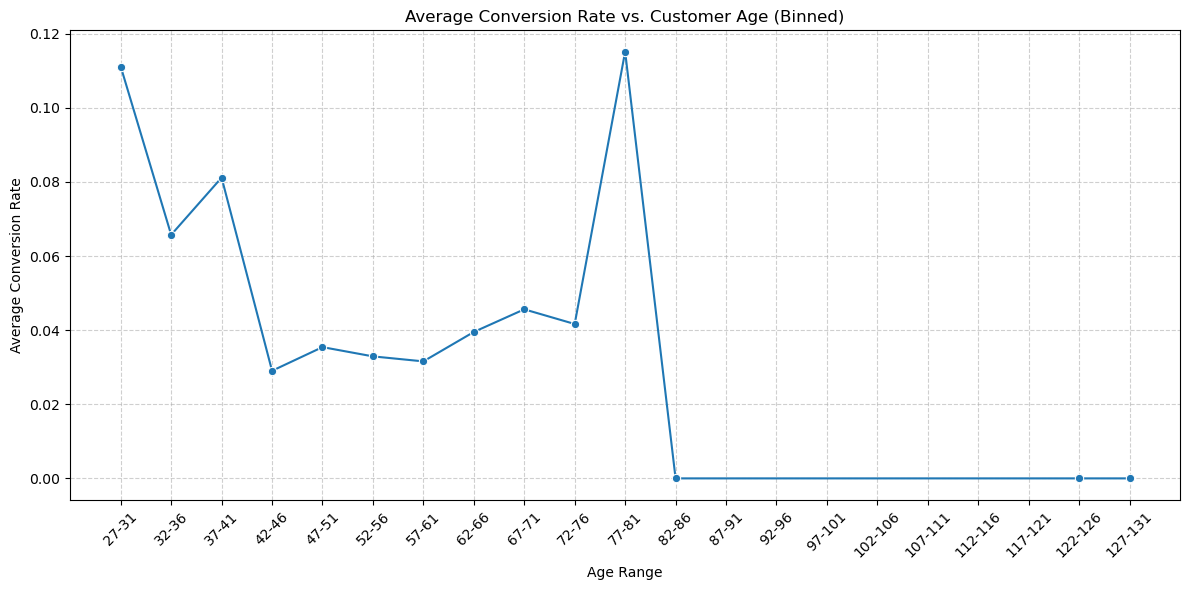

In [19]:
# --- Binning ---

# Define age bins
bins = list(range(df['Customer_Age'].min(), df['Customer_Age'].max() + 5, 5)) # Create bins of 5-year intervals
labels = [f'{i}-{i+4}' for i in bins[:-1]] # Create labels for the bins

# Create a new column with age bins
df['Age_Bin'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

# --- Calculate average conversion rate per bin ---

# Calculate the mean conversion rate for each age bin
bin_means = df.groupby('Age_Bin')['Conversion_Rate'].mean().reset_index()

# --- Plotting ---

plt.figure(figsize=(12, 6))
sns.lineplot(x='Age_Bin', y='Conversion_Rate', data=bin_means, marker='o')
plt.title('Average Conversion Rate vs. Customer Age (Binned)')
plt.xlabel('Age Range')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45) # Rotate x-axis labels for readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Interpretations:
1. **Younger Customers (27-46) are Volatile**: Marketing strategies targeting younger customers need to be carefully analyzed and potentially tailored to the specific within-group variations.
2. **Mid-Age Customers (42-76) are Consistent but Low**: This group shows more stable, but lower, conversion rates. Efforts should be made to understand why their conversion rates are lower and how to improve them.
3. **The 77-81 Data Point Needs Investigation**: It's important to understand why this age group has a significantly higher conversion rate. It could be an outlier or a genuine trend.
4. **Older Customers (82+) Do Not Convert**: This is a critical finding. It's essential to investigate why older customers aren't converting. Possible reasons include:
    - Data errors.
    - Irrelevance of products or services to this age group.
    - Technical issues with the website or conversion process for older users.

### Recommendations:
1. **Investigate the 82+ Age Group**: Determine why they have zero conversion rates. Fix any technical issues, reassess the relevance of the offerings, and consider data accuracy.
2. **Analyze the Volatility in Younger Groups**: Conduct further analysis to identify factors influencing conversion rates in the 27-46 age range.
3. **Explore the 77-81 Anomaly**: Determine if it's an error or a real trend.